<a href="https://colab.research.google.com/github/yoohyunseok/Machine-Learnig-Deep-Learning/blob/main/train_test_split%EA%B3%BC_%ED%91%9C%EC%A4%80_%EC%A0%90%EC%88%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [33]:
import numpy as np

# numpy를 이용해서 데이터 셋 준비

In [34]:
np.column_stack(([1, 2, 3], [4, 5, 6])) #column_stack() => 전달 받은 리스트를 일렬로 세운 다음 차례대로 나란히 연결. column_stack((1열에 들어갈 놈들, 2열에 들어갈 놈들))

array([[1, 4],
       [2, 5],
       [3, 6]])

In [35]:
fish_data = np.column_stack((fish_length, fish_weight)) #fish_length와 fish_weight를 2차원 리스트로 연결

In [36]:
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [37]:
print(np.ones(5)) #ones() => 원하는 만큼 1로 채워진 numpy 배열 생성

[1. 1. 1. 1. 1.]


In [38]:
print(np.zeros(35)) #zeros() => 원하는 만큼 0으로 채워진 numpy 배열 생성

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [39]:
fish_target = np.concatenate((np.ones(35), np.zeros(14))) #concatenate() => 첫 번째 배열 뒤에 두번 째 배열을 이어붙인다. 첫 번째 차원을 따라 배열을 연결한다.

In [40]:
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


# train_test_split() 이용해서 훈련 세트, 테스트 세트 나누기

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42)
#fish_data가 train_input과 test_input으로, fish_target이 train_target, test_target으로 나뉨
#기본적으로 25%를 테스트 세트로 떼어낸다.

In [43]:
print(train_input.shape, test_input.shape) #2차원 배열
#numpy 배열의 크기는 튜플로 표현됨

(36, 2) (13, 2)


In [44]:
print(train_target.shape, test_target.shape) #1차원 배열

(36,) (13,)


In [45]:
print(test_target)

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


**클래스의 비율에 비해 빙어의 비율이 약간 모자름 => 약간의 샘플링 편향 발생**

**stratify 매개변수에 타깃 데이터를 전달해서 해결**

In [46]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify = fish_target, random_state=42) #클래스의 비율에 맞게 데이터를 나눔
# 훈련데이터가 작거나 특정 클래스의 샘플 개수가 적을 때 유용함

In [47]:
print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


In [48]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [49]:
print(kn.predict([[25, 150]])) #wtf?

[0.]


**산점도로 확인**

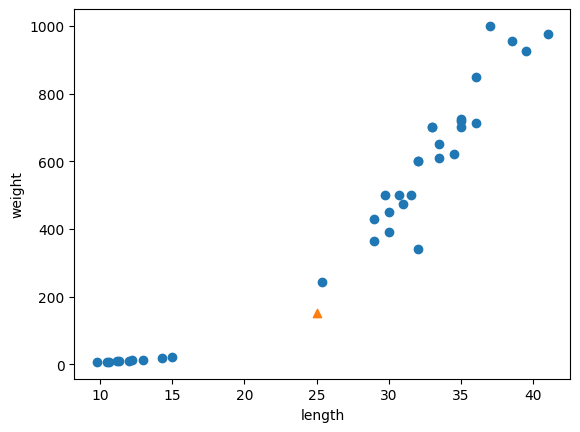

In [50]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:, 0], train_input[:, 1]) #매개 변수 1 x축, 매개 변수 2 y축
plt.scatter(25, 150, marker='^') #marker 매개변수는 모양을 지정
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [51]:
distances, indexes = kn.kneighbors([[25, 150]]) #kneighbors로 [[25, 250]] 샘플에서 가까운 이웃들(5개)과의 거리와 그 이웃들의 인덱스 반환

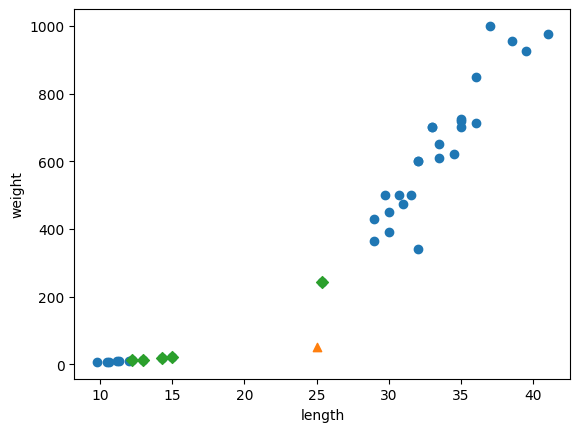

In [52]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 50, marker='^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker = 'D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [53]:
print(train_input[indexes])

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]


In [54]:
print(train_target[indexes]) #주위 이웃 중 4 마리가 빙어

[[1. 0. 0. 0. 0.]]


In [55]:
print(distances)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


**산점도의 거리 비율이 뭔가 이상함**

**x축, y축 비율을 맞춰보자**

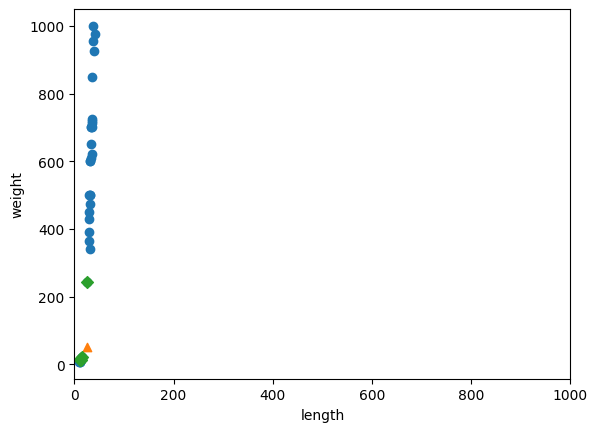

In [56]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 50, marker='^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker = 'D')
plt.xlim((0, 1000)) #x축 범위 지정
#y축 범위는 ylim()으로 지정
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

**이렇게 두 feature의 값의 범위가 매우 다른 현상을 "스케일이 다르다"라고 말한다**

# 데이터 전처리


*   데이터를 표한하는 기준이 다르면 알고리즘이 올바르게 예측할 수 없다. 특히 거리 기반 알고리즘
*   feature 값을 일정한 기준으로 맞춰 주는 작업인 데이터 전처리를 해줘야함(여기서는 표준 점수를 이용할거임)



# 표준 점수


*   표준 점수: 각 feature 값이 평균에서 표준 편차의 몇 배 만큼 떨어져 있는지를 나타낸다.

*   널리 쓰이는 전처리 방법

*   계산법: 데이터에서 평균을 빼고, 표준 편차로 나눈 값
+ 분산: 데이터에서 평균을 뺀 값을 모두 제곱한 다음 평균을 낸 값
+ 표준 편차: 분산의 제곱근(데이터가 분산된 정도를 나타냄)




In [58]:
mean = np.mean(train_input, axis = 0) #train_input의 평균 계산
std = np.std(train_input, axis = 0) #train_input의 표준 편차 계산
#axis = 0 으로 설정한 이유: feature 마다 값의 스케일이 다르므로 평균과 표준 편차는 각 특성별로 계산해야한다.
#axis = 0 이면 각 열의 통계 값을 계산한다.
# 예시 사진은 깃허브에..여기에 올리면 큰일난다

In [59]:
print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [68]:
train_scaled = (train_input - mean)/std #표준 점수로 변환
#이렇게만 적어도 broadcasting 덕분에 train_input의 모든 값에 mean을 빼주고 std로 나눠준다. 레전드 편리함
#broadcasting: 크기가 다른 넘파이 배열에서 자동으로 사칙 연산을 모든 행이나 열로 확장하여 수행하는 기능

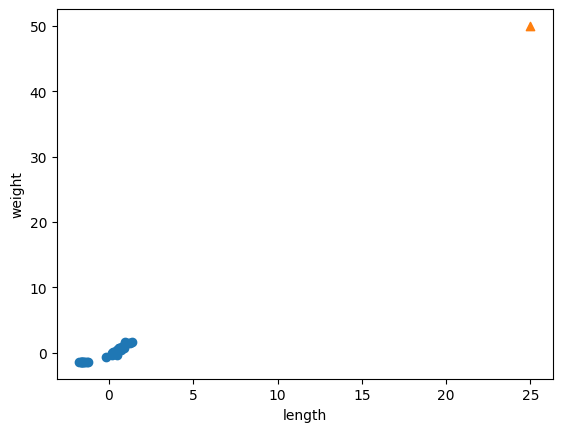

In [61]:
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(25, 50, marker='^') #얘 혼자 표준 점수로 변환이 안되어서 튐
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
#

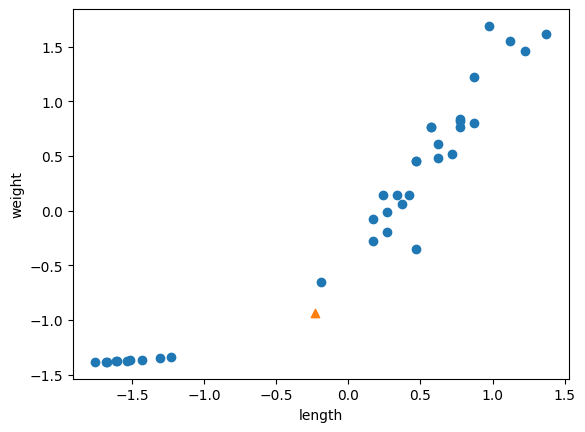

In [62]:
new = ([25, 150] - mean)/std # 표준 점수로 변환
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

**모델 훈련 및 평가**

In [63]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

**반드시 훈련 세트를 기준으로 테스트 세트를 바꿔야한다**

In [64]:
test_scaled = (test_input - mean)/std #test_input도 표준 점수로 변환해주는거 잊지 말기
#이때 사용되는 mean과 std는 훈련 세트를 기준으로 구한 것 잊지 말기

In [65]:
kn.score(test_scaled, test_target) #이제 도미로 잘 나옴

1.0

**표준 점수로 변환 후 다시 가까운 이웃 다섯 구하기**

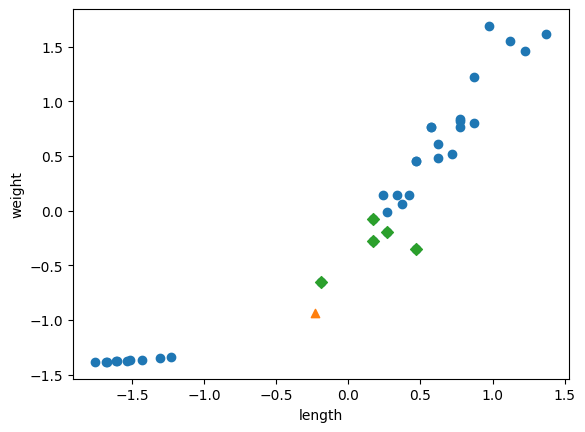

In [70]:
distances, index = kn.kneighbors([new]) #new 샘플에서 가까운 다섯 이웃의 거리와 인덱스 반환
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker = '^') #'^' => 세모
plt.scatter(train_scaled[index, 0], train_scaled[index, 1], marker = 'D') #'D' => 마름모
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
